#__PRACTICAL SESSION 1__ Unsupervised & Supervised ML#

The dataset is the [_MIT-BIH Arrhythmia database_](https://physionet.org/content/mitdb/1.0.0/) composed of 10,000 [electrocardiograms (__ECG__)](https://en.wikipedia.org/wiki/Electrocardiography). Each ECG has 180 time samples and corresponds to a normal heart beat or 4 specific heart problem. Thus, we have 5 labels:

1.   'A': Atrial premature beat
2.   'L': Left bundle branch block beat
3.   'N': Normal beat
4.   'R': Right bundle branch block beat
5.   'V': Premature ventricular contraction

Data are available on eCAMPUS:


*   __X_tp1.npy__: a 10000x180 numpy matrix
*   __Y_tp1.npy__: a 10000 numpy vector with the associated labels (encoded by one character 'A', 'L', ...)

Download the dataset and put the numpy files into a '__/data__' directory.

First part is dedicated to UNSUPERVISED LEARNING with Principal Component Analysis (PCA) and Clustering (K-Means).

Second part is SUPERVISED LEARNING with _Logistic Regression_, _Naive Bayes Classifier_ and _Support Vector Machine_.

The goal of this practical session is to experiment! Everything you need is easily available in the SKLEARN documentation that contains many, many examples.  

#BONUS STRIKE 🎳

You can make additional experiences. In that case, please add bonus works at the end of your notebook in the __[BONUS]__ section.

Bonus works could bring bonus points on the global note for the practical sessions **_if and only if_** all the mandatory jobs have been done correctly.

#How this Jupyter Notebook works?

*   Questions and things to do are marked as __[QUESTION]__
*   When you have a comment or a answer to bring to a __[QUESTION]__ you have to use the __[ANSWER]__ field below.
*   When the answer of the __[QUESTION]__ is a code, you have a __[CODE]__ mention and you simply need to complete the code block below (that starts with _#Your code here_)



#Import basic libs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#The Machine Learning library is SCIKIT-LEARN (SKLEARN), we will do targeted imports regarding our needs.

#Load data and process data [3 pts]

Data must be located in a ./data directory at the same level as this notebook

In [ ]:
#IF YOU USE Google COLAB, you can mount your Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Create a data directory, put the numpy files and load. With Colab case, create 'data' here:
X=np.load("/content/drive/MyDrive/Colab Notebooks/data/X_tp1.npy")
Y_raw=np.load("/content/drive/MyDrive/Colab Notebooks/data/Y_tp1.npy")

__[QUESTION]__ What are the shapes of X and Y?

__[CODE]__

In [ ]:
#Your code here
print(X.shape)
print(Y_raw.shape)



(10000, 180)
(10000,)


__[QUESTION]__ Plot a sample *x* from **X**

__[CODE]__

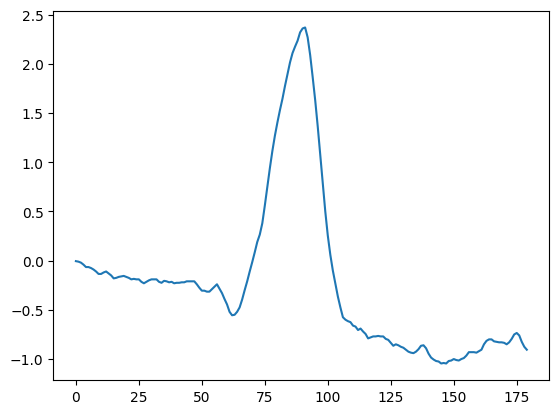

In [ ]:
sample_x = X[190]
plt.plot(sample_x)
plt.show()

__[QUESTION]__ Check the Y values. For convenience, it's better to handle integer values for the names of the labels.
Use the scikit-learn tool [__LabelEncoder()__](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html) to do that.

You must have this mapping: {'A': 0, 'L': 1, 'N': 2, 'R': 3,  'V': 4}

__[CODE]__

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Your code here
le = LabelEncoder()

le.fit(["A", "L", "N", "R", "V"])

Y = le.transform(Y_raw)
print(Y)

[0 4 2 ... 3 1 4]


## Data visualization

__[QUESTION]__ Plot the average of the samples belonging to the label 0, 1, 2, 3 and 4.

*Option:* Additionally, you can plot the average ECG +/- the standard deviation using the [fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method from matplotlib (plt.fill_between(np.linspace(0,180,180), mean - std, mean + std))

__[CODE]__

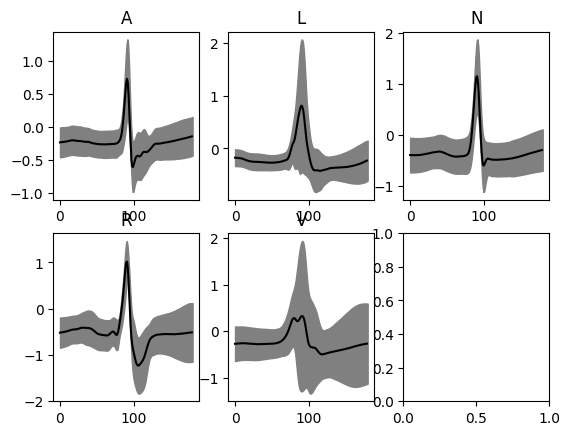

In [ ]:
#Your code here

def plot_means(X, Y, le) :
  fig, axs = plt.subplots(2,3)
  labels, cat = le.classes_, le.transform(le.classes_)
  for i, label, ax in zip(cat, labels, axs.flatten()):
    Xi = X[Y == i]
    mean = Xi.mean(axis=0)
    std = Xi.std(axis=0)
    ax.plot(mean, c='k')
    ax.fill_between(np.linspace(0, 180, 180), mean-std, mean+std, color='grey')
    ax.set_title(label)
  plt.show()

plot_means(X, Y, le)

## Data normalization

__[QUESTION]__ Why (in Machine Learning) is it usually a good thing to normalize a dataset?

__[ANSWER]__ Pour que certains paramètres ne prennent pas trop d'importance.



__[QUESTION]__ With the **preprocessing** environment from **sklearn** use the [**StandardScaler()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) to normalize your data. The scaled data will be noted **X_scaled**

__[CODE]__

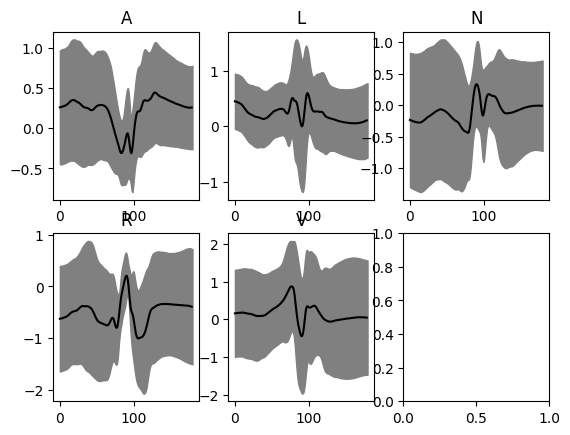

In [ ]:
from sklearn import preprocessing
#Your code here
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
plot_means(X_scaled, Y, le)

#UNSUPERVISED LEARNING [15 pts]

## [Unsupervised] Principal Component Analysis (PCA) [5 pts]

For this part, we set in an UNSUPERVISED LEARNING context.

__[QUESTION]__ What does it mean in terms of learning objective?


__[ANSWER]__ On cherche P(X)



__[QUESTION]__ Since we have 180 time samples per ECG, we are working in ℜ^180. We want to project our data in a new space with lower dimensions. For that, we experiment Principal Component Analysis.

1.    Use the [PCA](https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) method from sklearn and fit it to your data (**X_scaled**).     
2.    With the attribute *explained_variance_ratio_*  plot the cumulative plot (NB: cummulative sum with numpy is simply _cumsum()_). Add a legend for the X and Y axis.   

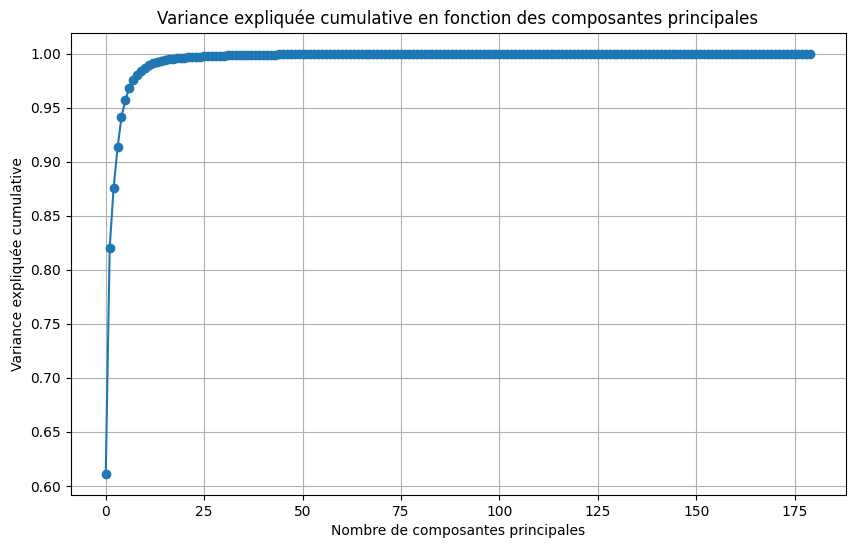

In [ ]:
from sklearn.decomposition import PCA
#Your code here
pca = PCA(n_components=180)
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-')

# Ajout des légendes et du titre
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulative")
plt.title("Variance expliquée cumulative en fonction des composantes principales")
plt.grid()
plt.show()

__[QUESTION]__ How many components do we need to keep 95% of the variance of the dataset? (below, we note this value **nb_comp**)



*__*[ANSWER]__ Nombre de composantes nécessaires : 6.



In [ ]:
#Your code here
nb_comp = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

print(f"Nombre de composantes nécessaires pour expliquer 95% de la variance: {nb_comp}")

Nombre de composantes nécessaires pour expliquer 95% de la variance: 6


__[QUESTION]__ Apply the PCA to project your data on a new space composed by **nb_comp** dimensions.

__[CODE]__

In [ ]:
#Your code here
pca = PCA(n_components=nb_comp)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

__[QUESTION]__ Take a random sample _x_ from X_scaled. Plot the original _x_ and the one resulting from the PCA with **nb_comp**. Comment your result.

__NB__ Slides 128, 129 from course #1 is really important for this question

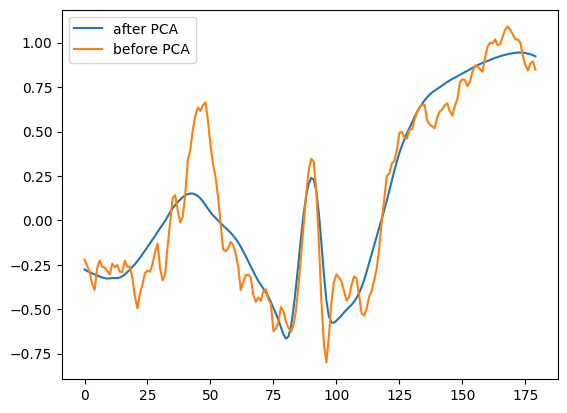

In [ ]:
X_scaled_pca_inverse = pca.inverse_transform(X_reduced)
sample_x_pca = X_scaled_pca_inverse[6789]
sample_x = X_scaled[6789]
plt.plot(sample_x_pca, label=f'after PCA')
plt.plot(sample_x, label=f'before PCA')
plt.legend()

plt.show()


## [Unsupervised] Clustering (K-MEANS) [10 pts]

Now, we will perform data clustering on our dataset. We will cheat a little bit and fix **K=5** (i.e., the number of labels).

__[QUESTION]__ Why do I say that we are cheating by fixing K=5?


__[ANSWER]__ On triche un peu car on fixe K à 5 sachant pertinament qu'il y a 5 labels.

__[QUESTION]__ Use [Kmeans]() from sklearn with **K=5** and apply (fit) it to your projected data coming from PCA. Each sample belongs to a cluster represented by an id. So the outputs must be a vector of length 10,000 gathering the cluster id of each sample.

__[CODE]__

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(42)
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_reduced)
Y_kmeans = kmeans.labels_

__[QUESTION]__ A (hard) question is: *how good is my clustering?* Obviously, since we cheat and know the labels and fix **K=5**, we expect to have all the samples from the label 'A' in one cluster, all the samples from label 'L' in another one, etc.

To measure how good is my clustering, we have several metrics. We will use the **homogeneity**, **completeness** and **v_measure**. The 3 metrics are implemented in the method [homogeneity_completeness_v_measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html) in sklearn.

Briefly explain what is measured by each metric?

__[ANSWER]__
Homogeneity : Mesure si chaque cluster ne contient que des points ayant une seule classe vraie.
Completeness : Vérifie si tous les points d'une classe vraie donnée sont dans un seul cluster.
V-Measure : Moyenne harmonique de l'homogénéité et de la complétude.



__[QUESTION]__ Compute the metrics for your clustering. Comment.

In [ ]:
from sklearn.metrics import homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(Y, Y_kmeans)


(0.1934758219541508, 0.20347518481939492, 0.1983495593080268)

__[COMMENT]__ Si les valeurs sont faibles, cela indique que les clusters obtenus ne correspondent pas bien aux classes réelles.



__[QUESTION]__ Project your original data (**X_scaled**) with a PCA with *n_components = 2*. then, apply again your KMeans on this 2-D dataset and compute the metrics.

In [ ]:
pca2 = PCA(2)
X_scaled_pca_2 = pca2.fit_transform(X_scaled)
kmeans2 = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_scaled_pca_2)
Y_kmeans_2 = kmeans2.labels_
homogeneity_completeness_v_measure(Y, Y_kmeans_2)


(0.18722684147996244, 0.1981781223889515, 0.19254689162712976)

__[QUESTION]__ Plot your 2-D dataset in a graph by labelling the data with the exact ECG label (i.e., your Y). Make a second plot by labelling the data with the id of the cluster. An easy way is to use the Matplotlib method [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) (use: marker='o',alpha=0.5,edgecolors='black')

Comment (i.e., does what you see with this 2-D representation explain your result with the previous metrics?).

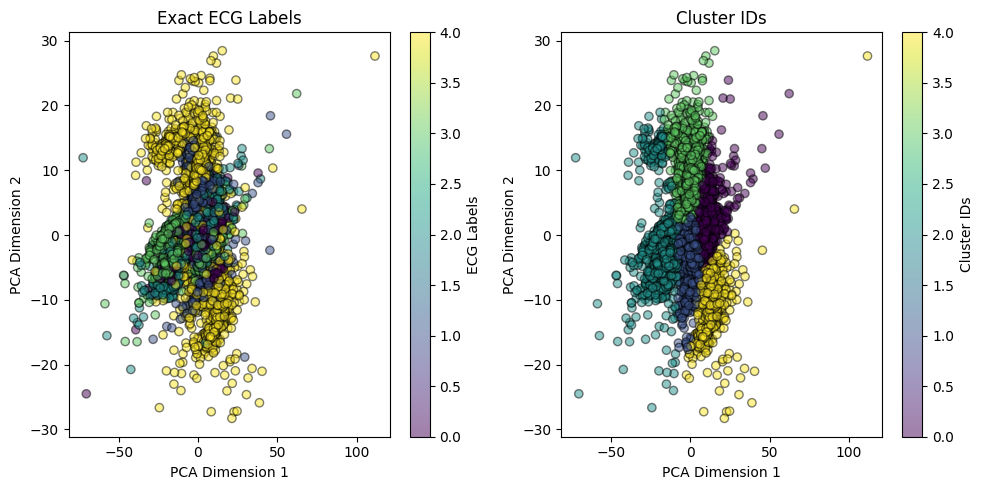

In [ ]:
import matplotlib.pyplot as plt

# Graphique 1 : données labellisées avec les étiquettes ECG
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(
    X_scaled_pca_2[:, 0], X_scaled_pca_2[:, 1],
    c=Y, cmap='viridis', marker='o', alpha=0.5, edgecolors='black'
)
plt.title('Exact ECG Labels')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(scatter, label='ECG Labels')

# Graphique 2 : données labellisées avec les clusters K-Means
plt.subplot(1, 2, 2)
scatter = plt.scatter(
    X_scaled_pca_2[:, 0], X_scaled_pca_2[:, 1],
    c=Y_kmeans_2, cmap='viridis', marker='o', alpha=0.5, edgecolors='black'
)
plt.title('Cluster IDs')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(scatter, label='Cluster IDs')

plt.tight_layout()
plt.show()



*__*[COMMENT]*__*
Le graphique avec les étiquettes ECG réels suggère que, bien que certaines étiquettes ECG soient bien séparées dans l'espace 2D, d'autres se chevauchent. Le graphique représentant les clusters montre que K-Means a imposé des séparations artificielles là où il "voit" des motifs, même si ces séparations ne correspondent pas parfaitement à la vérité.


Cela met en évidence les limites de l'algorithme de clustering lorsqu'il est appliqué à des jeux de données des frontières de classes qui se chevauchent.


#SUPERVISED LEARNING [17 pts]

## [Supervised] Logistic Regression [5 pts]

Now, we set in a **SUPERVISED LEARNING** context and aim to perform a CLASSIFICATION TASK. We will build and train several **models**. After training, the goal of a **model** is to take a ECG input *x* and provide the probabilities that this *x* belongs to our 5 labels (*Y*).  

__[QUESTION]__ Formally, what is the learning goal of our models?

__[ANSWER]__ On cherche P(X|Y)



__[QUESTION]__ Before implementing supervised ML models, we need to split our dataset (X,Y) into a TRAIN (Xtrain, Ytrain) dataset and a TEST (Xtest, Ytest) dataset. Why ?  

__[ANSWER]__ Cela permet d'évaluer la performance du modèle sur des données qu'il n'a pas vues pendant l'entraînement.



__[QUESTION]__ Use the SKLEARN method [train_test_split]() applied on your X_scaled dataset. Use test_size=0.30 and random_state=42. Check the size of the resulting (X_train, y_train, X_test, y_test).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(

    X_scaled, Y, test_size=0.30, random_state=42)
print(X_train)
print(X_test)


[[ 1.23066792  1.20137554  1.17152291 ... -0.16120657 -0.12418973
  -0.07810036]
 [-1.14127682 -1.17850365 -1.20022896 ...  1.42659469  1.35242835
   1.29730964]
 [-1.890312   -1.67953085 -1.53007525 ... -1.59987732 -1.69749114
  -1.77972941]
 ...
 [-0.09574854 -0.12947795 -0.13215527 ... -0.07348274 -0.05387459
  -0.05165017]
 [ 0.02909065  0.04275015  0.04062136 ...  0.26864018  0.28012236
   0.29220233]
 [-0.00211915  0.05840725  0.04062136 ...  0.47917737  0.48227841
   0.53025406]]
[[ 0.51284254  0.54377734  0.5746582  ...  0.59321834  0.59654052
   0.60960464]
 [-0.78236413 -0.89667585 -0.98033144 ... -1.35425061 -1.38107298
  -1.31244268]
 [ 0.13832495  0.23063534  0.16627708 ... -0.70509429 -0.73065788
  -0.70408825]
 ...
 [ 0.15392985  0.27760664  0.43329551 ...  0.6633974   0.66685567
   0.61842137]
 [ 0.16953475  0.21497824  0.18198405 ...  0.78621076  0.70201324
   0.66250502]
 [ 0.52844744  0.49680604  0.51183034 ...  0.81252791  0.78111778
   0.73303887]]


__[QUESTION]__ The first model we will implement is a **LOGISTIC REGRESSION** model. Remember that this model is a very simple **LINEAR** model. You will use the [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) from SKLEARN.

1.  Define a LogisticRegression model
2.  Apply it to your training data (*fit* method)
3.  Compute the predictions on your test data (*prediction* method)
4.  Compute the accuracy on both the training and the test datasets (*score* method)
5.  Compute the [confusion_matrix](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html) on the test set
6.  [Display](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay) your confusion matrix


Training Accuracy: 0.84
Test Accuracy: 0.83


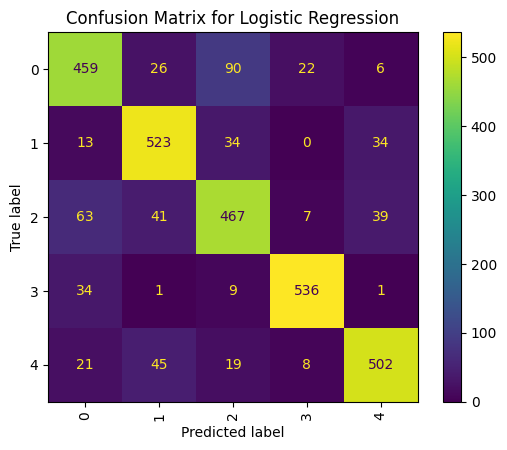

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)
clf.predict(X_train)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Prédictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Précision
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Affichage des résultats
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()



## [Supervised] Gaussian Naive Bayes Classifier [4 pts]


__[QUESTION]__ The second model we will implement is a **GAUSSIAN NAIVE BAYES CLASSIFIER** model. You will use the [GaussianNB](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html) from SKLEARN.

Do exactly the same 6 steps seen before for the logistic regression.

__[QUESTION]__ What is the main difference - in terms of LEARNING OBJECTIVE - for the Gaussian Naive Bayes model?

__[ANSWER]__ Le modèle Gaussian Naive Bayes repose sur une hypothèse forte d’indépendance conditionnelle entre les caractéristiques données la classe.
La différence principale est donc :

    Régression Logistique : Optimise une fonction de coût basée sur une frontière de décision linéaire. Elle ne fait pas d’hypothèses sur la distribution des données.
    Naive Bayes : Calcule directement la probabilité conditionnelle d’une classe en supposant que les données suivent une distribution gaussienne (normalement distribuée) et que les caractéristiques sont indépendantes.

Training Accuracy (Naive Bayes): 0.56
Test Accuracy (Naive Bayes): 0.55


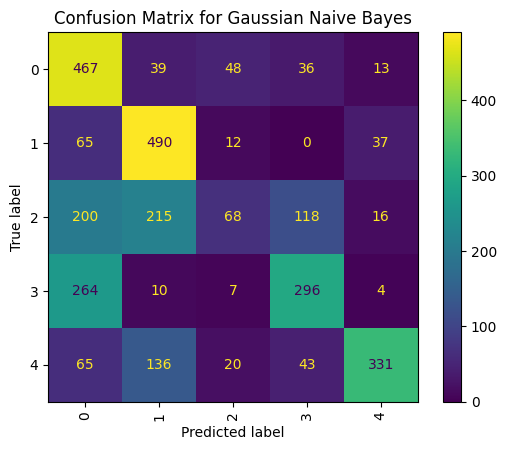

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Définir et entraîner le modèle
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prédictions
y_train_pred_gnb = gnb.predict(X_train)
y_test_pred_gnb = gnb.predict(X_test)

# Précision
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Affichage des résultats
print(f"Training Accuracy (Naive Bayes): {train_accuracy_gnb:.2f}")
print(f"Test Accuracy (Naive Bayes): {test_accuracy_gnb:.2f}")

# Matrice de confusion
conf_matrix_gnb = confusion_matrix(y_test, y_test_pred_gnb)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gnb, display_labels=gnb.classes_)
disp_gnb.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.show()



## [Supervised] SVM [5 pts]



__[QUESTION]__ The third model we will implement is a **SUPPORT VECTOR MACHINE (SVM)** model. You will use [SVC](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from SKLEARN.

Do exactly the same 6 steps seen before two times:
1.   With the 'rbf' kernel (i.e., the Gaussian kernel. It's the default value of the *kernel* parameter)
2.   With the 'linear' kernel

SVM with RBF Kernel - Training Accuracy: 0.93
SVM with RBF Kernel - Test Accuracy: 0.92


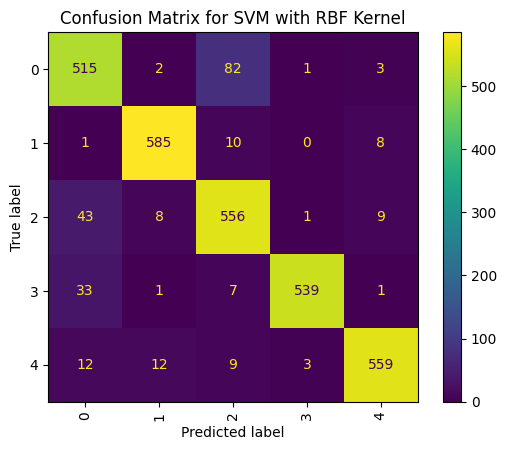

SVM with Linear Kernel - Training Accuracy: 0.90
SVM with Linear Kernel - Test Accuracy: 0.88


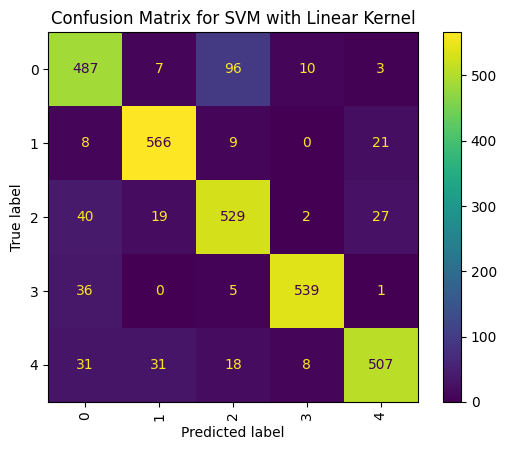

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. SVM avec le noyau RBF (par défaut)
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(X_train, y_train)

# Prédictions pour RBF
y_train_pred_rbf = svc_rbf.predict(X_train)
y_test_pred_rbf = svc_rbf.predict(X_test)

# Précision pour RBF
train_accuracy_rbf = accuracy_score(y_train, y_train_pred_rbf)
test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)

# Matrice de confusion pour RBF
conf_matrix_rbf = confusion_matrix(y_test, y_test_pred_rbf)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf, display_labels=svc_rbf.classes_)

# Affichage des résultats pour RBF
print(f"SVM with RBF Kernel - Training Accuracy: {train_accuracy_rbf:.2f}")
print(f"SVM with RBF Kernel - Test Accuracy: {test_accuracy_rbf:.2f}")
disp_rbf.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.show()

# 2. SVM avec le noyau linéaire
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train, y_train)

# Prédictions pour Linear
y_train_pred_linear = svc_linear.predict(X_train)
y_test_pred_linear = svc_linear.predict(X_test)

# Précision pour Linear
train_accuracy_linear = accuracy_score(y_train, y_train_pred_linear)
test_accuracy_linear = accuracy_score(y_test, y_test_pred_linear)

# Matrice de confusion pour Linear
conf_matrix_linear = confusion_matrix(y_test, y_test_pred_linear)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear, display_labels=svc_linear.classes_)

# Affichage des résultats pour Linear
print(f"SVM with Linear Kernel - Training Accuracy: {train_accuracy_linear:.2f}")
print(f"SVM with Linear Kernel - Test Accuracy: {test_accuracy_linear:.2f}")
disp_linear.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for SVM with Linear Kernel")
plt.show()


__[QUESTION]__ Comment the results you obtained with these models. [3 pts]

__[ANSWER]__
Logistic Regression :

    Avec une précision d'entraînement de 84 % et une précision de test de 83 %, la régression logistique montre de bonnes performances avec un risque modéré de surapprentissage.
    Cela s'explique par sa simplicité et son hypothèse de linéarité, adaptée si les classes sont linéairement séparables.
  
Gaussian Naive Bayes :

    Avec une précision d'entraînement de 56 % et de test de 55 %, ce modèle est beaucoup moins performant.
    L'hypothèse forte d'indépendance entre les caractéristiques et une distribution normale ne semble pas correspondre à la structure des données ECG.
  
SVM (RBF Kernel) :

    Avec une précision d'entraînement de 93 % et de test de 92 %, c'est le modèle le plus performant.
    Le noyau RBF capture des relations complexes non linéaires entre les données, ce qui explique ses meilleures performances.

SVM (Linear Kernel) :

    Avec une précision d'entraînement de 90 % et de test de 88 %, le SVM linéaire est légèrement moins performant que le RBF.
    Cela indique que les données sont partiellement linéairement séparables, mais que le noyau RBF est mieux adapté.

Le SVM avec noyau RBF est le meilleur modèle pour ce dataset en termes de précision, suivi par le SVM linéaire et la régression logistique. Le modèle Naive Bayes est inadapté à cette tâche en raison de ses hypothèses trop restrictives.


# BONUS

Random Forest Classifier

Random Forest - Training Accuracy: 1.00
Random Forest - Test Accuracy: 0.95


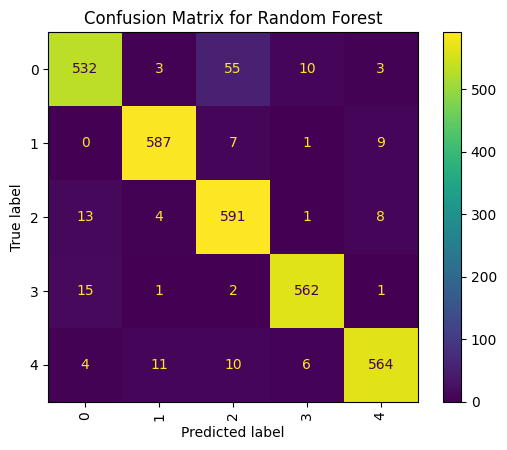

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Définir et entraîner le modèle Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Prédictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Précision
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Affichage des résultats
print(f"Random Forest - Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.2f}")

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix for Random Forest")
plt.show()


Précision d'entraînement : 100 %

    Cela suggère que le modèle a parfaitement appris les données d'entraînement, mais cela pourrait également indiquer un risque d'overfitting.

Précision de test : 95 %

Random Forest surpasse les deux noyaux SVM (RBF et linéaire) en termes de généralisation.

La matrice de confusion pour le Random Forest montre des valeurs diagonales très élevées.
